In [245]:
# import data from google drive
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [246]:
# import library
import pandas as pd
import seaborn as sns
import matplotlib as plt

In [247]:
# read csv data
customer_origin = pd.read_csv("/content/drive/My Drive/Project_Data/customer_origin.csv")

# show data
customer_origin

,order_id,customer_id,order_status,price,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,58.90,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,239.90,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,199.00,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,12.99,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,199.90,varzea paulista,SP
...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,delivered,299.99,sao luis,MA
112646,fffcd46ef2263f404302a634eb57f7eb,84c5d4fbaf120aae381fad077416eaa0,delivered,350.00,curitiba,PR
112647,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,99.90,sao paulo,SP
112648,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,delivered,55.99,vinhedo,SP


In [248]:
# count missing value
customer_origin.isna().sum()

order_id          0
customer_id       0
order_status      0
price             0
customer_city     0
customer_state    0
dtype: int64

In [249]:
# check outlier
customer_origin.describe()

,price
count,112650.000000
mean,120.653739
std,183.633928
min,0.850000
25%,39.900000
50%,74.990000
75%,134.900000
max,6735.000000


In [250]:
# check duplicate
customer_origin.duplicated(keep=False)

0         False
1         False
2         False
3         False
4         False
          ...  
112645    False
112646    False
112647    False
112648    False
112649    False
Length: 112650, dtype: bool

In [251]:
# remove duplicate
customer_origin = customer_origin.drop_duplicates(subset=["order_id"])

In [252]:
# check inconsistent format & frequencies
customer_origin["customer_state"].value_counts()

SP    41375
RJ    12762
MG    11544
RS     5432
PR     4998
SC     3612
BA     3358
DF     2125
ES     2025
GO     2007
PE     1648
CE     1327
PA      970
MT      903
MA      740
MS      709
PB      532
PI      493
RN      482
AL      411
SE      345
TO      279
RO      247
AM      147
AC       81
AP       68
RR       46
Name: customer_state, dtype: int64

In [253]:
# delete order status other than delivered
customer_origin = customer_origin[customer_origin["order_status"] == "delivered"]

In [254]:
# check value on order_status
customer_origin["order_status"].value_counts()

delivered    96478
Name: order_status, dtype: int64

In [255]:
# counting the total of customer state
customer_origin1 = customer_origin.groupby("customer_state").agg(["count"])

In [256]:
# delete column
table1 = customer_origin1.drop(["customer_id", "price", "customer_city", "order_id"], axis = 1)
table1.head()

,order_status
,count
customer_state,
AC,80
AL,397
AM,145
AP,67
BA,3256


In [257]:
# counting the sum of price
customer_origin2 = customer_origin.groupby("customer_state").agg(["sum"])

In [258]:
# delete column
table2 = customer_origin2.drop(["customer_id", "order_status", "customer_city", "order_id"], axis = 1)
table2.head()

,price
,sum
customer_state,
AC,14858.98
AL,74723.69
AM,20581.48
AP,11595.98
BA,447295.96


In [259]:
# join two dataframe
table3 = pd.concat([table1, table2], axis = 1)
table3.head()

,order_status,price
,count,sum
customer_state,,
AC,80,14858.98
AL,397,74723.69
AM,145,20581.48
AP,67,11595.98
BA,3256,447295.96


In [260]:
# reset index
table3.reset_index(inplace=True)

In [261]:
# change column name
table3.columns = ["customer_state", "number_of_order", "price"]
table3.head()

,customer_state,number_of_order,price
0,AC,80,14858.98
1,AL,397,74723.69
2,AM,145,20581.48
3,AP,67,11595.98
4,BA,3256,447295.96


In [262]:
# multiply price and order count columns
table3["revenue"] = table3.number_of_order * table3.price
table3.head()

,customer_state,number_of_order,price,revenue
0,AC,80,14858.98,1.188718e+06
1,AL,397,74723.69,2.966530e+07
2,AM,145,20581.48,2.984315e+06
3,AP,67,11595.98,7.769307e+05
4,BA,3256,447295.96,1.456396e+09


In [263]:
# find average total order
table3["average_order"] = table3.price / table3.number_of_order
table3.head()

,customer_state,number_of_order,price,revenue,average_order
0,AC,80,14858.98,1.188718e+06,185.737250
1,AL,397,74723.69,2.966530e+07,188.220882
2,AM,145,20581.48,2.984315e+06,141.941241
3,AP,67,11595.98,7.769307e+05,173.074328
4,BA,3256,447295.96,1.456396e+09,137.375909


In [264]:
# delete column
table4 = table3.drop(["price"], axis = 1)
table4.head()

,customer_state,number_of_order,revenue,average_order
0,AC,80,1.188718e+06,185.737250
1,AL,397,2.966530e+07,188.220882
2,AM,145,2.984315e+06,141.941241
3,AP,67,7.769307e+05,173.074328
4,BA,3256,1.456396e+09,137.375909


In [265]:
# set new index
table4 = table4.set_index("customer_state")

In [266]:
# rounding column value
table4["revenue"] = table4["revenue"].astype(int).astype(str)
table4["average_order"] = table4["average_order"].round(2)

In [267]:
# sort the data by the highest order
table4 = table4.sort_values(by=["number_of_order"], ascending=False)
table4

,number_of_order,revenue,average_order
customer_state,,,
SP,40501,187210719152,114.13
RJ,12350,19760856966,129.56
MG,11354,16200057169,125.67
RS,5345,3559100324,124.58
PR,4923,2978753013,122.91
SC,3546,1642287099,130.61
BA,3256,1456395645,137.38
DF,2080,568863505,131.49
ES,1995,491274116,123.43


In [268]:
# delete column
table4_plot = table4.drop(["average_order"], axis = 1)

In [269]:
# sort the data by average order
table5 = table4.sort_values(by=["average_order"], ascending=False)
table5.head()

,number_of_order,revenue,average_order
customer_state,,,
PB,517,54153139,202.60
AL,397,29665304,188.22
AC,80,1188718,185.74
RO,243,10608602,179.66
AP,67,776930,173.07


In [270]:
# delete column
table5_plot = table5.drop(["number_of_order"], axis = 1)

Text(0, 0.5, 'Total Order')

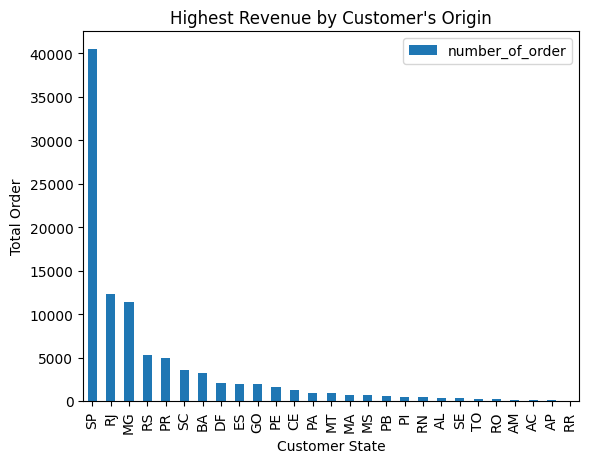

In [271]:
# visualise the data by the highest order and revenue
table4_plot = table4_plot.plot(kind='bar')
table4_plot.set_title("Highest Revenue by Customer's Origin")
table4_plot.set_xlabel("Customer State")
table4_plot.set_ylabel("Total Order")

Text(0, 0.5, 'Average Order Value per Transaction')

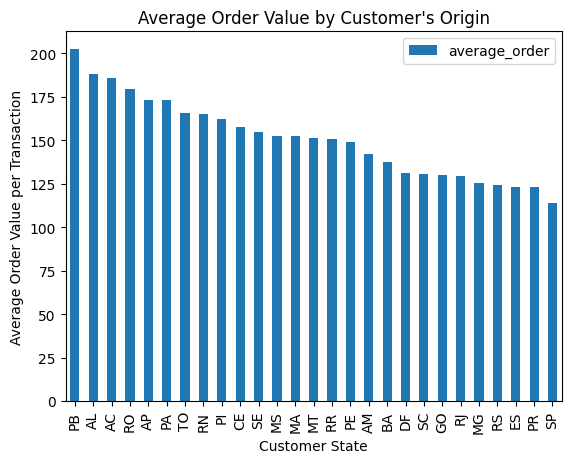

In [272]:
# visualise the data by average order value
table5_plot = table5_plot.plot(kind='bar')
table5_plot.set_title("Average Order Value by Customer's Origin")
table5_plot.set_xlabel("Customer State")
table5_plot.set_ylabel("Average Order Value per Transaction")